# 판다스 데이터프레임 생성

# 1. 데이터프레임 생성

* 인덱스(=행 이름)와 열 이름의 유무에 따라 다른 형태를 취함
* **pd.DataFrame()** 함수를 사용해 데이터프레임을 직접 만들 수 있음
* 데이터프레임을 만들기 위해서는 다음 세 가지를 위한 데이터가 필요합니다.
    - 데이터
    - 열 이름
    - 인덱스 이름



##### 1) 라이브러리 불러오기

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

##### 2) 리스트로 만들기

In [ ]:
# 1차원 리스트 만들기
stock = [94500, 92100, 92200, 92300]

# 데이터프레임 만들기
df = pd.DataFrame(data=stock)

# 확인
df.head()  # print로 보는 것 지양. why? 모양이 사라짐

In [ ]:
# 2차원 리스트 만들기
stock = [[94500, 92100, 92200, 92300],
         [96500, 93200, 95900, 94300],
         [93400, 91900, 93400, 92100],
         [94200, 92100, 94100, 92400],
         [94500, 92500, 94300, 92600]]

dates = ['2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19']
names = ['High', 'Low', 'Open', 'Close']

# 데이터프레임 만들기
df = pd.DataFrame(stock, columns=names, index=dates)

# 확인
df.head()

##### 3) 딕셔너리로 만들기
- 딕셔너리로 데이터프레임을 만들면 딕셔너리의 **키**가 **열 이름**이 됩니다.
- 인덱스를 지정하지 않으면 행 번호가 인덱스가 됩니다.

In [ ]:
# 딕셔너리 만들기
dict = {'Name': ['Gildong', 'Sarang', 'Jiemae', 'Yeoin'],
        'Level': ['Gold', 'Bronze', 'Silver', 'Gold'],
        'Score': [56000, 23000, 44000, 52000]}

# 확인
dict

In [ ]:
# 데이터프레임 만들기
df = pd.DataFrame(dict)

# 확인
df.head()

In [ ]:
#### 연습문제

# 리스트 만들기
list_score = [[80, 75, 100, 90, 80],
              [85, 70,  80, 95, 90],
              [75, 80,  85, 90, 90],
              [85, 65,  85, 75, 70],
              [70, 85,  90, 85, 95]]
list_index = ['Gildong', 'Sarang', 'Jiemae', 'Yeoin', 'Woodong']
list_col = ['Korean', 'English', 'Math', 'Science', 'History']

score = pd.DataFrame(list_score, index=list_index, columns=list_col)

score

$ $

##### 4) CSV파일 읽어오기
- **read_csv()** 함수를 사용해서 CSV 파일에서 데이터를 읽어옵니다.
    - 1) path = 'https-------'  
    - 2) 변수 = pd.read_csv(path)

**[주요옵션]**
- sep: 구분자 지정(기본값 = 콤마)
- header: 헤더가 될 행 번호 지정(기본값 = 0)
- index_col: 인덱스 열 지정(기본값 = False)
- names: 열 이름으로 사용할 문자열 리스트
- encoding: 인코딩 방식을 지정

※ 참고

한글이 포함된 파일을 읽을 때 다음과 같은 encoding 오류가 발생하면 **encoding='CP949'**로 지정

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 0: invalid start byte

**[pop_simple 데이터 셋 정보]**

- year: 연도
- household: 가구 수
- k_male: 한국인 남자
- k_female: 한국인 여자
- f_male: 외국인 남자
- f_female: 외국인 여자

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/pop_simple.csv'
pop = pd.read_csv(path) 

# 상위 10행만 확인
pop.head(10)   # NaN(= null값): 측정치가 결여가 됐다.

In [ ]:
            #######   연습문제     ###########

In [ ]:
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/weather_simple.csv'
temp = pd.read_csv(path)
temp.head()

In [ ]:
# 로컬 파일 읽어오기
tips = pd.read_csv('tips.csv')
tips.head()

In [ ]:
# # # csv 파일 저장
# tips.to_csv('tips2.csv')  # csv파일로

# tips.to_excel('tips2.xlsx')   # excel파일로

$ $

##### 5) 인덱스 다시 설정

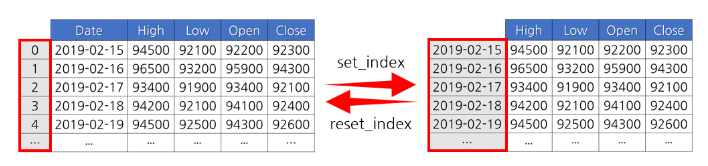

**일반 열을 인덱스로 지정**

- 파일을 불러올 때 **index_col** 옵션을 사용해 인덱스가 될 열을 선택할 수 있습니다.
- 파일을 불러온 후에 **set_index()** 메소드를 사용해 인덱스가 될 열을 설정할 수 있습니다.

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/pop_simple.csv'
pop = pd.read_csv(path) 
pop.head()

In [ ]:
# 기기존 열 중 하나를 인덱스로 설정
pop = pop.set_index('year')

# 확인
pop.head()

## set_index는 반영되는 것이 아님. 
## 1)변수 = 변수.set_index()라고 반영시켜줘야 함
## 2) set_index( , inplace=True) 옵션을 사용해서 바로 반영킬 수 있음.
## cf) inplce옵션을 주면 앞에서 변수를 받아선 안 됨!!!!

**인덱스 이름 삭제**

In [ ]:
# 인덱스 이름 삭제
pop.index.name = None

# 확인
pop.head()

**인덱스 초기화**
- **reset_index()** 메소드를 사용해 행 번호에 기반한 정수 값으로 인덱스를 초기화 할 수 있습니다.
- **drop=True**를 설정하면 기존 인덱스 열을 일반 열로 가져오지 않고 버립니다.(기본값=False)

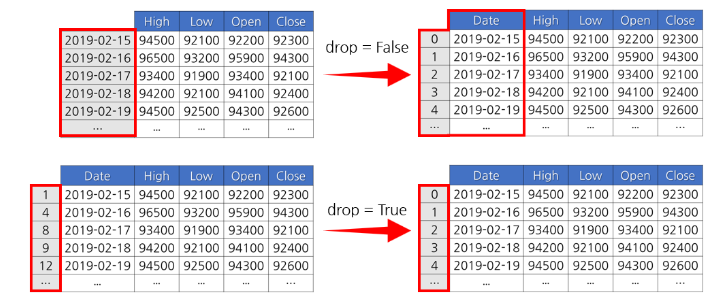

In [ ]:
# 현재 데이터
pop.head()

In [ ]:
# 인덱스 초기화
pop.reset_index(drop=False, inplace=True)

# 확인
pop.head()

In [ ]:
# 열 이름 변경
pop.rename(columns={'index':'year'}, inplace=True)
pop.head()